In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'

dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfratfil  = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')

dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions').set_index('index')

In [2]:
# calculation moments
theta = np.pi / 2
x, y = np.cos(theta), np.sin(theta)

np.arctan2(y, x) 

1.5707963267948966

In [3]:
dfrat.describe()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id
count,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06,1.280662e+06
mean,9.073073e+04,3.780447e+02,4.171135e-03,1.126962e-01,-1.757355e-02,-1.764554e-02,-1.764985e-01,-5.330155e-02,3.427937e+00
std,5.483929e+04,2.284971e+02,5.472566e-02,5.773475e-02,5.453772e-02,5.957492e-01,4.486547e-01,6.399129e-01,2.165823e+00
min,0.000000e+00,0.000000e+00,-9.420275e-02,4.327843e-02,-9.999978e-02,-9.999981e-01,-9.999986e-01,-9.999998e-01,0.000000e+00
25%,4.533000e+04,1.888750e+02,-4.663273e-02,7.851390e-02,-6.850875e-02,-5.427750e-01,-5.608227e-01,-6.578161e-01,2.000000e+00
50%,8.876300e+04,3.698459e+02,8.407816e-04,9.655091e-02,-2.171306e-02,-2.256700e-02,-1.453605e-01,-7.001106e-02,3.000000e+00
75%,1.312200e+05,5.467500e+02,5.410460e-02,1.157454e-01,3.207740e-02,5.280534e-01,1.285384e-01,5.372806e-01,5.000000e+00
max,2.452310e+05,1.021796e+03,1.274465e-01,2.999993e-01,8.559266e-02,9.999951e-01,9.761727e-01,9.999952e-01,7.000000e+00


In [4]:
import holoviews as hv
from holoviews.operation.datashader import datashade, aggregate
hv.extension('matplotlib')

In [5]:
import datashader as ds
import datashader.transfer_functions as tf

In [6]:
import xarray as xr


class mean(ds.reductions.Reduction):
    """Mean of all elements in ``column``.

    Parameters
    ----------
    column : str
        Name of the column to aggregate over. Column data type must be numeric.
        ``NaN`` values in the column are skipped.
    """
    _dshape = ds.reductions.dshape(ds.reductions.Option(ds.reductions.ct.float64))

    @property
    def _bases(self):
        return (ds.reductions.sum(self.column), ds.reductions.count(self.column))

    @staticmethod
    def _finalize(bases, **kwargs):
        sums, counts = bases
        with np.errstate(divide='ignore', invalid='ignore'):
            x = sums  / counts
        return xr.DataArray(x, **kwargs)

In [7]:
class dsum(ds.reductions.Reduction):
    """Mean of all elements in ``column``.

    Parameters
    ----------
    column : str
        Name of the column to aggregate over. Column data type must be numeric.
        ``NaN`` values in the column are skipped.
    """
    _dshape = ds.reductions.dshape(ds.reductions.Option(ds.reductions.ct.float64))

    @property
    def _bases(self):
        return (ds.reductions.sum(self.column),)

    @staticmethod
    def _finalize(bases, **kwargs):
        sums, = bases
        with np.errstate(divide='ignore', invalid='ignore'):
            x = sums
        return xr.DataArray(x, **kwargs)

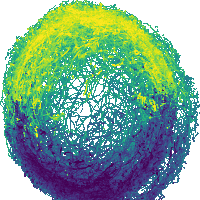

In [8]:
def random_agg(data):
    return np.random.choice(data)

cvs = ds.Canvas(plot_height=200, plot_width=200)
agg =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=dsum('Z_Ori'))

img = tf.shade(agg, cmap=ds.colors.viridis)
img

In [9]:
from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0

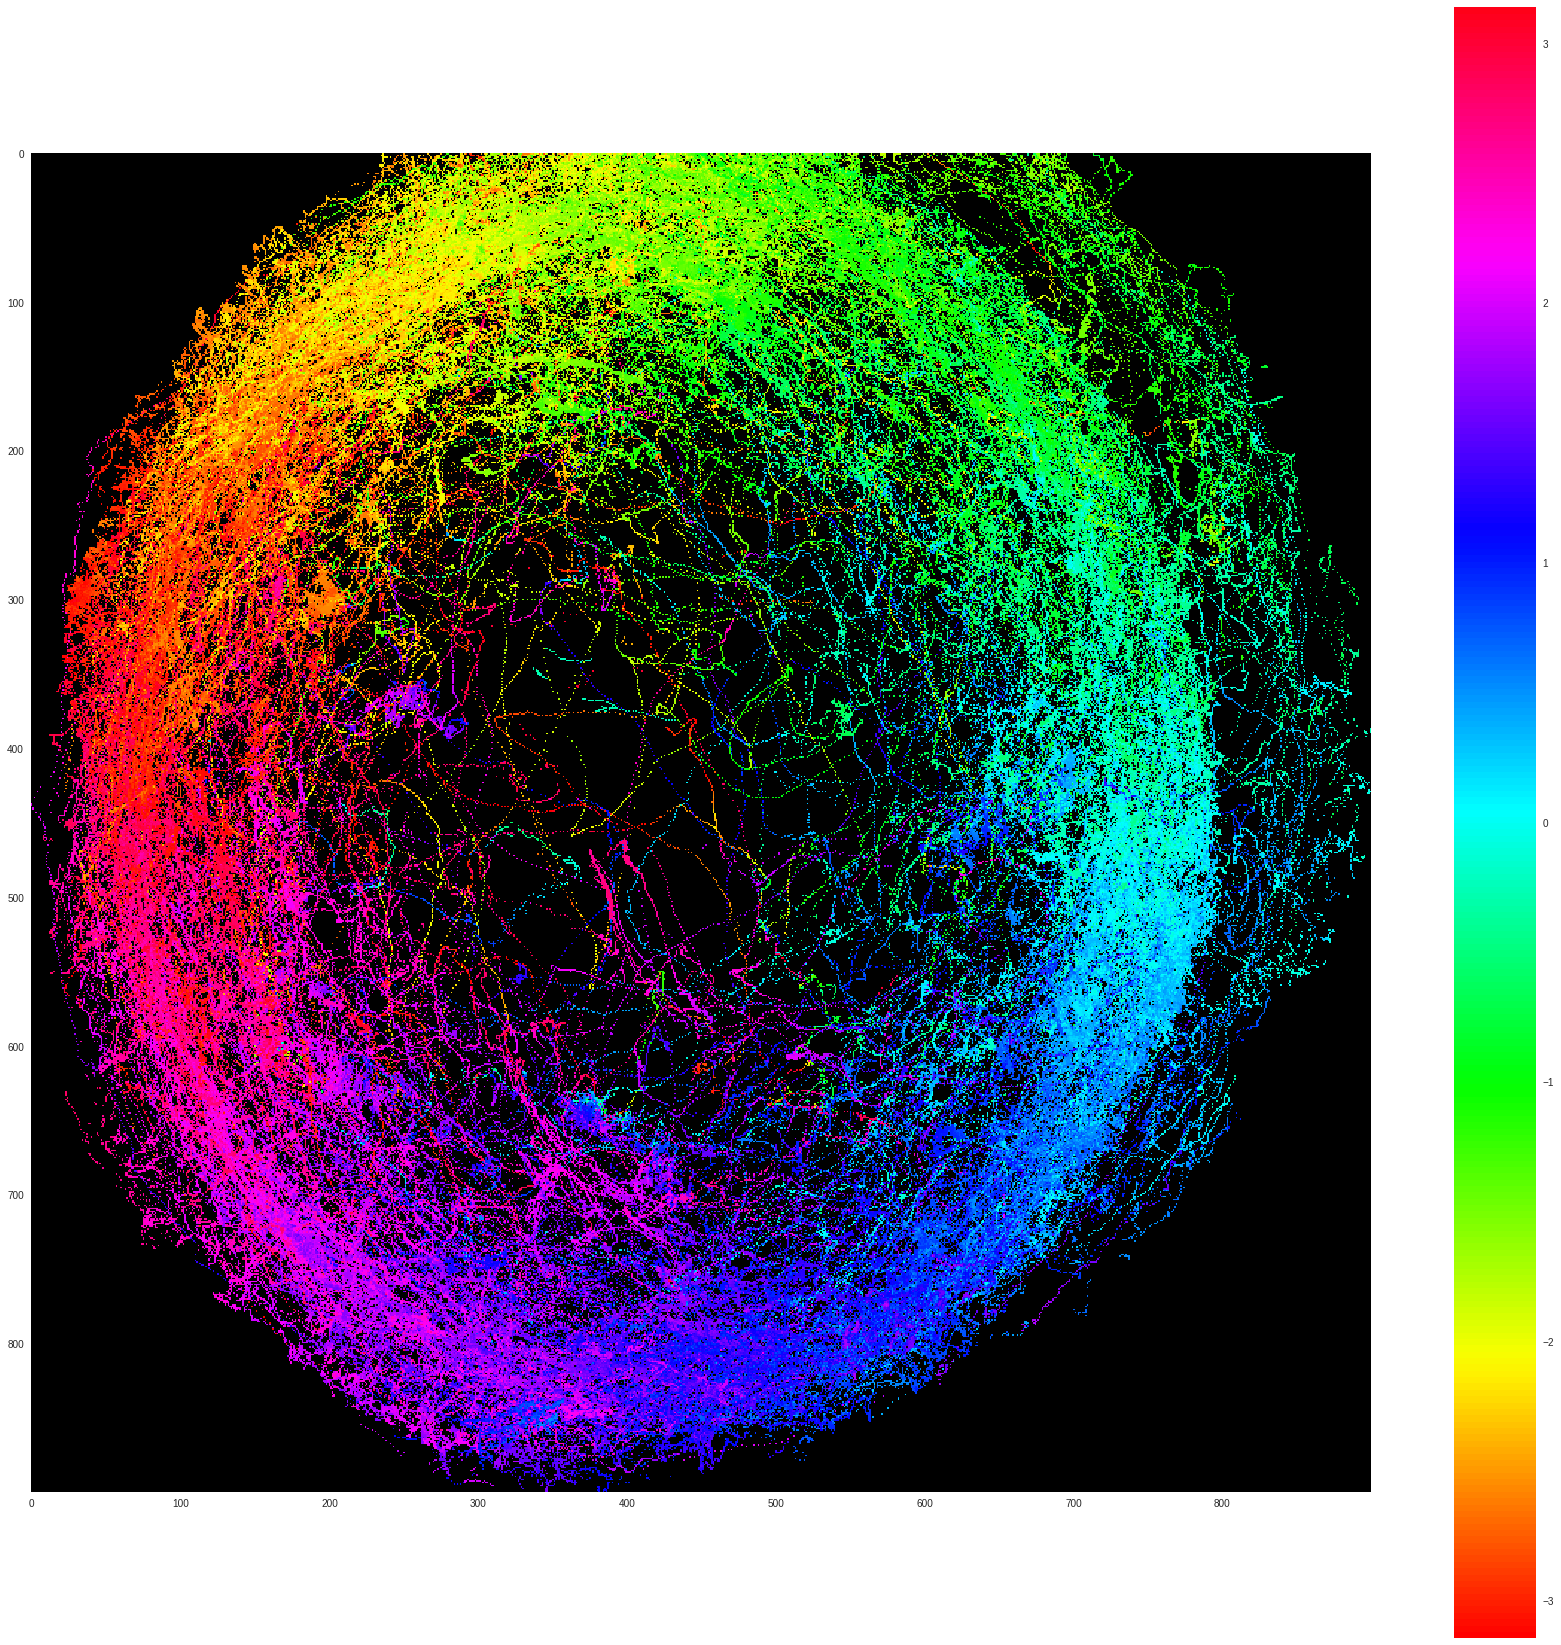

In [10]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()

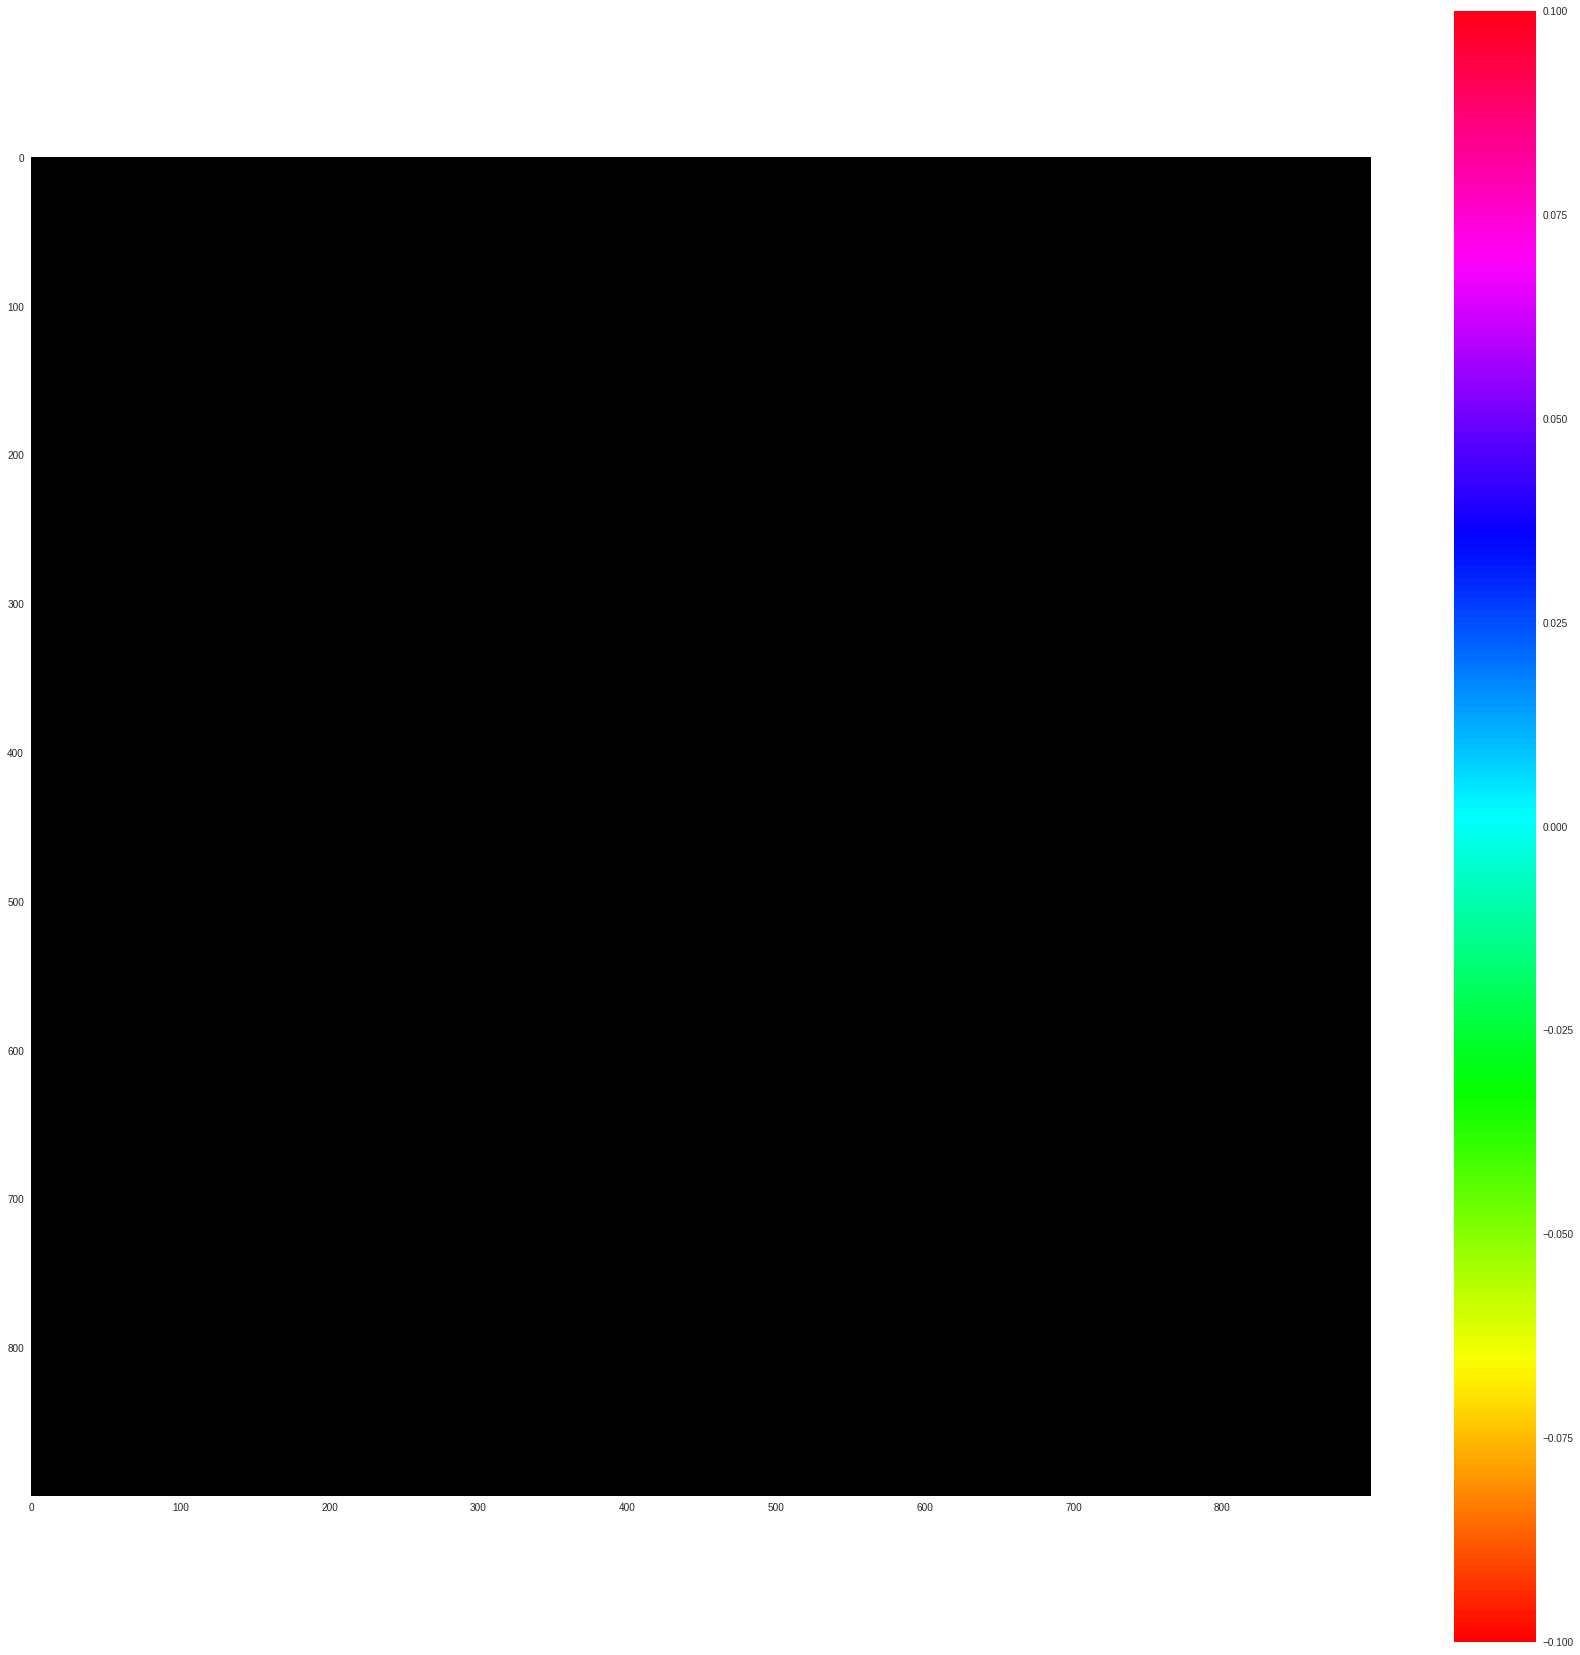

In [15]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfrat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

# theta = np.arctan2(agg_zn, agg_xn)
theta = np.arccos(np.dot(agg_xn, agg_zn) / (np.linalg.norm(agg_xn) * np.linalg.norm(agg_zn)))

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()

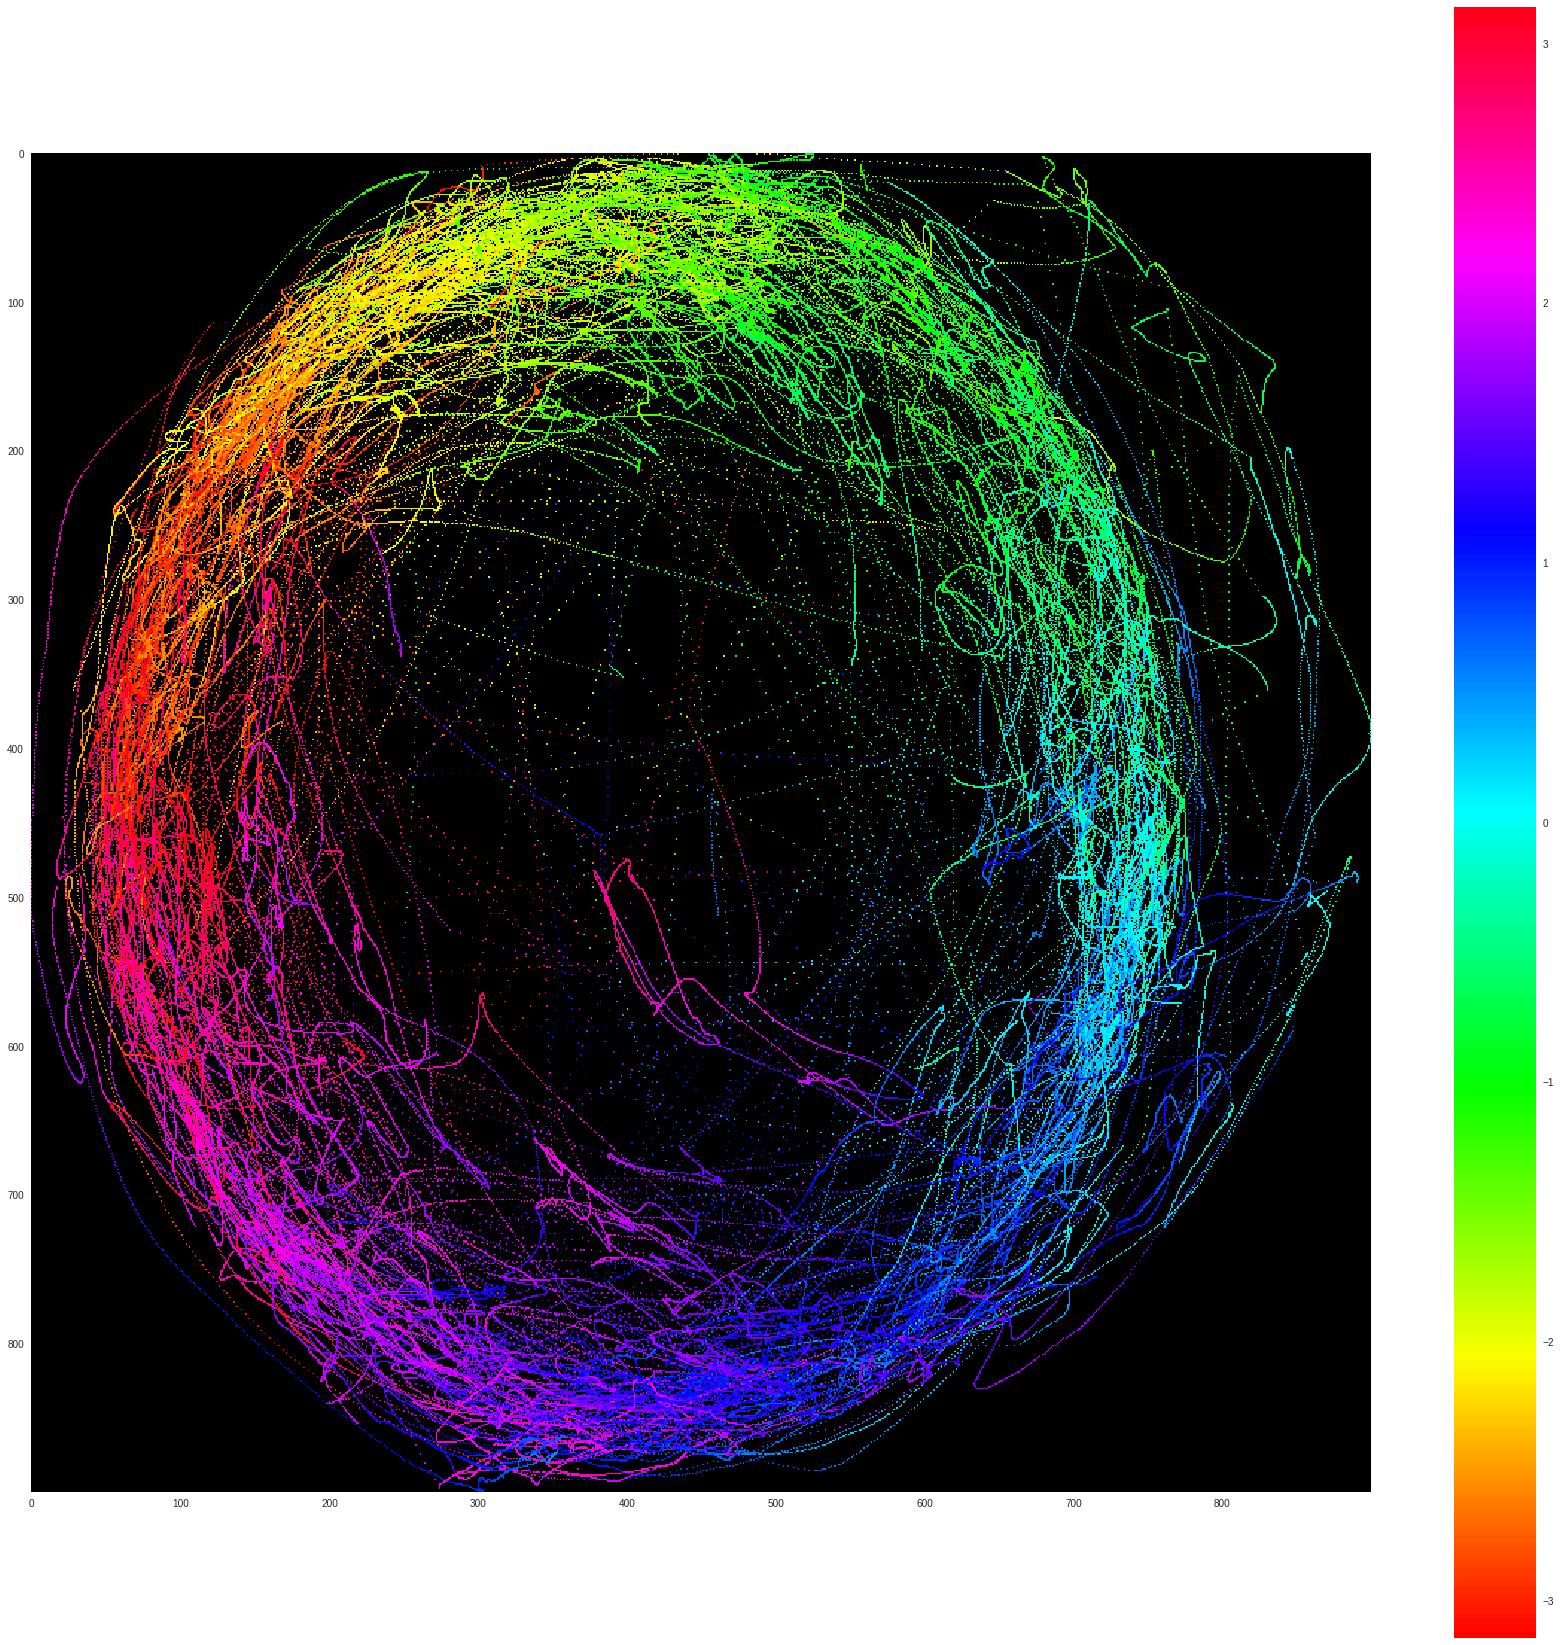

In [12]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfratfil, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfratfil, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar()

In [13]:
datashade??

Init signature: datashade(*args, **params)
Source:        
class datashade(aggregate, shade):
    """
    Applies the aggregate and shade operations, aggregating all
    elements in the supplied object and then applying normalization
    and colormapping the aggregated data returning RGB elements.

    See aggregate and shade operations for more details.
    """

    def _process(self, element, key=None):
        agg = aggregate._process(self, element, key)
        shaded = shade._process(self, agg, key)
        return shaded
File:           ~/anaconda3/lib/python3.6/site-packages/holoviews/operation/datashader.py
Type:           ParameterizedMetaclass


:DynamicMap   []
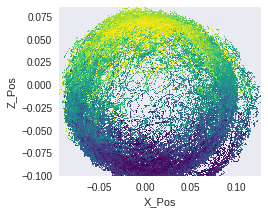

In [14]:
points = hv.Points(dfrat[['X_Pos', 'Z_Pos', 'Z_Ori']])
# points + points(style={'s': 2, 'alpha': .5}) + 
datashade(points, width=400, height=400, aggregator=ds.mean('Z_Ori'), cmap=ds.colors.viridis)